# Homework 2 Astrophysics
## Alexandra Higley

### Question 1

In [1]:
import numpy as np
from pylab import *
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import math

In [2]:
AbsMag_MS,BV_MS,temp_MS=loadtxt('colormag.dat',unpack=True,skiprows=4,usecols=(0,1,2))
num,s,vmag_O,BV_O=loadtxt('OrionUBV.dat',unpack=True,skiprows=4,usecols=(0,1,2,3))

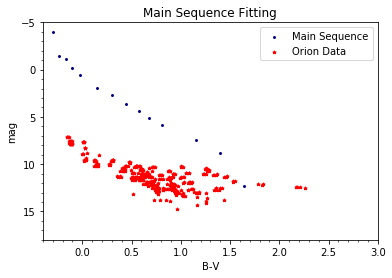

In [3]:
plt.scatter(BV_MS,AbsMag_MS,s=15,marker='.',color='darkblue',label='Main Sequence')
plt.scatter(BV_O,vmag_O,s=10,marker='*',color='red',label='Orion Data')
plt.title("Main Sequence Fitting")
plt.xlabel('B-V')
plt.ylabel('mag')
axis([-0.4,3,18,-5]) 
plt.minorticks_on()
plt.legend()
plt.show()

In [4]:
dm = 8
test = vmag_O - dm

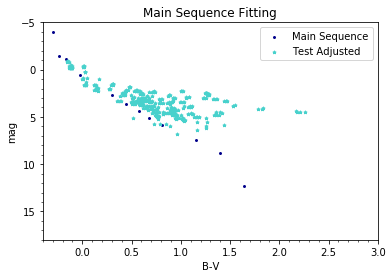

In [5]:
plt.scatter(BV_MS,AbsMag_MS,s=15,marker='.',color='darkblue',label='Main Sequence')
plt.scatter(BV_O,test,s=10,marker='*',color='mediumturquoise',label='Test Adjusted')
plt.title("Main Sequence Fitting")
plt.xlabel('B-V')
plt.ylabel('mag')
axis([-0.4,3,18,-5]) # set range on axis
plt.minorticks_on()
plt.legend()
plt.show()

In [6]:
d = (10**(dm/5))*10
print("So, the distance is {} pc".format(d))

So, the distance is 398.1071705534973 pc


I ended up only partly using the provided code and filled in some of it with my own. Ultimately, I did the equivelent of what we did in class. Overlaying the Orion data on the theoretical Main Sequence, we can find a distance modulus by moving the Orion data up and down the y-axis until we get a good fit to the Main Sequence. This works because the distance modulus is an expression that is a difference between absolute magnitude and the apparent magnitude, and thr theoretical Main Sequence data is given in absolut magnitudes and the Orion data is given in apparent magnitudes. 

By fitting the data, you can take the value of how much you moved the data up or down the y axis as your distance modulus, and then use the distance modulus equation to find your approximate distance in parsecs. Eyeballing my plots, I guessed a distance modulus of 8, subtracted that from the Orion apparent magnitudes, and then found the distance using the distance modulus equation. I found the distance to be around **398 parsecs** which is pretty close to a distance in a published paper **(0.41 kpc or 410 pc)** * 

For guessing a distance modulus by just looking at a plot, our estimate was pretty decent. 


*"TRIGONOMETRIC PARALLAXES OF MASSIVE STAR-FORMING REGIONS. VI. GALACTIC STRUCTURE,
FUNDAMENTAL PARAMETERS, AND NONCIRCULAR MOTIONS" 2009, Reid et al 

## Question 2

### Part A

In [7]:
wav,erg=loadtxt('G2V.dat',unpack=True,skiprows=1,usecols=(0,1))

In [8]:
dist = np.linspace(1,206265,2799)
# An array of distances representing 1 au to 1 pc (206,265 AU) at intervals of 2799 so it fits the same length of
#data provided to us by the flux array
lum = 4*(10**33)
nflux = (lum/((4)*(np.pi)*(dist**2)))
#inverse square law

distpc = dist*(4.8481*10**(-6))
distcm = dist*(1.4961*10**(13))

Text(0.5, 1.0, 'Flux over Distance of a G2V type star')

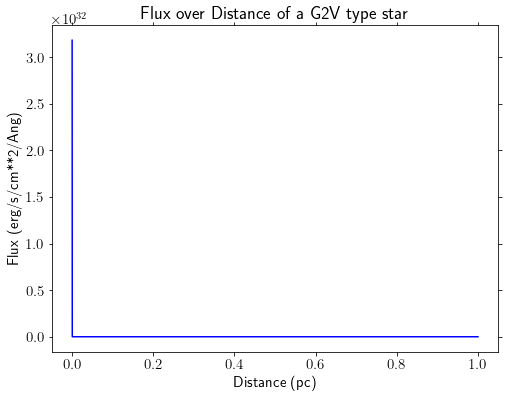

In [9]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Distance (pc)')
ax1.set_ylabel('Flux (erg/s/cm**2/Ang)')

ax1.plot(distpc,nflux, color="blue")

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Flux over Distance of a G2V type star")

In [10]:
disto = np.linspace(1,206265,2799)
lumo = (4*(10**33))*499000
#From the book, we know that O5V type stars are 499,000 time more luminous than G2V stars, so we can
#mulitply our original luminosoty data by that amount. 

nfluxo = (lumo/((4)*(np.pi)*(disto**2))) 

distpco = disto*(4.8481*10**(-6))
distcmo = dist*(1.4961*10**(13))

Text(0.5, 1.0, 'Flux over Distance of an G5V type star')

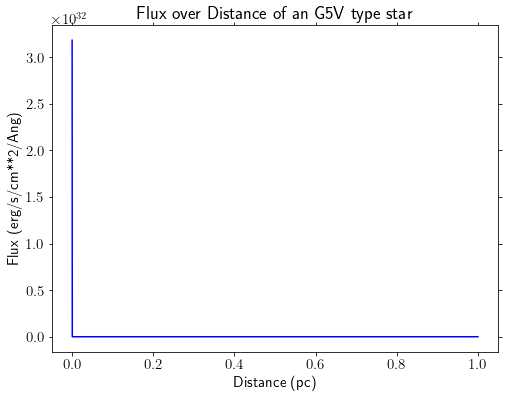

In [11]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Distance (pc)')
ax1.set_ylabel('Flux (erg/s/cm**2/Ang)')

ax1.plot(distpc,nflux, color="blue")

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Flux over Distance of an G5V type star")

In [12]:
#ascii.write([distcm,distpc,nflux], 'GStarDistdata.dat', names=['Distance (cm)', 'Distance (pc)', 'Flux (erg/s/cm^2/Ang)'])
#ascii.write([distcmo,distpco,nfluxo], 'OStarDistdata.dat', names=['Distance (cm)', 'Distance (pc)', 'Flux (erg/s/cm^2/Ang)']) 

**Note:** If I uncommented the lines above, they would write out two data files for the G2V star and the O5V star that would have a table containing the distance in cm in the first column, the distance in pc in the next, and finally the flux in erg/s/cm^2/Ang. 

So there is a problem here because we are plotting over such a large distance that we can't see any noticable change in the flux of the G star or the O star as the distance increases. To solve for this, we can log both sides of the plot so that we can better visualize what is going on here. That is what we are going to do in part b. 

### Part B

In [13]:
arraydist = np.array(dist)
arrayflux = np.array(nflux)

f_lis = []
d_lis = []
#initializing arrays

for i in range(0,2799):
    logflux = np.log(arrayflux[i])
    f_lis.append(logflux)
    f_arr = np.array(f_lis)
    
for i in range(0,2799):
    logdist = np.log(arraydist[i])
    d_lis.append(logdist)
    d_arr = np.array(d_lis)
    
#Logged all data for flux and distance (au) and created new arrays to contain it

Text(0.5, 1.0, 'Flux over Distance of a G2V type star')

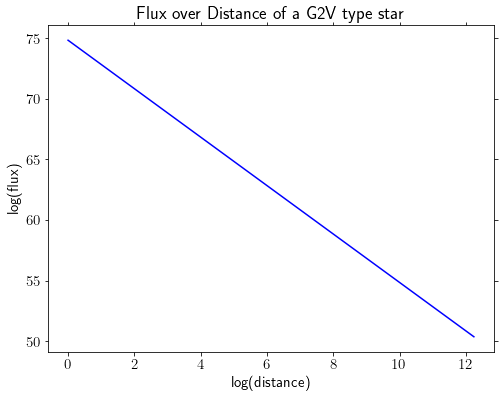

In [14]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig2,ax2 = plt.subplots(figsize=(8,6))

ax2.set_xlabel('log(distance)') #Note that I am logging the distance in AU
ax2.set_ylabel('log(flux)')

ax2.plot(d_arr,f_arr, color="blue",)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)

ax2.set_title(("Flux over Distance of a G2V type star"))

In [15]:
arraydisto = np.array(disto)
arrayfluxo = np.array(nfluxo)

f_liso = []
d_liso = []
#initializing arrays

for i in range(0,2799):
    logfluxo = np.log(arrayfluxo[i])
    f_liso.append(logfluxo)
    f_arro = np.array(f_liso)
    
for i in range(0,2799):
    logdisto = np.log(arraydisto[i])
    d_liso.append(logdisto)
    d_arro = np.array(d_liso)
    
#Logged all data for flux and distance (au) and created new arrays to contain it

Text(0.5, 1.0, 'Flux over Distance of an O5V type star')

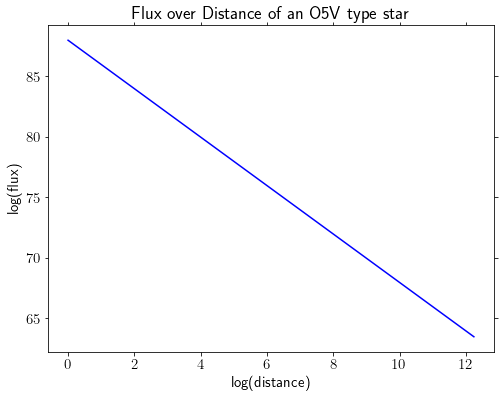

In [16]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig2,ax2 = plt.subplots(figsize=(8,6))

ax2.set_xlabel('log(distance)') #Note that I am logging the distance in AU
ax2.set_ylabel('log(flux)')

ax2.plot(d_arro,f_arro, color="blue",)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)

ax2.set_title(("Flux over Distance of an O5V type star"))

Much better! Now we can find the slope of this linear function in part c.

### Part C 

In [17]:
x1g = (d_arr[30])
x2g = (d_arr[700])

y1g = (f_arr[30])
y2g = (f_arr[700])
#Literally chose 2 random points on the plot

slopeg = (y2g - y1g)/(x2g - x1g)
#slope equation

print("So, the slope for the G2V star plot is about {}".format(slopeg))

So, the slope for the G2V star plot is about -1.999999999999999


In [18]:
x1o = (d_arro[30])
x2o = (d_arro[700])

y1o = (f_arro[30])
y2o = (f_arro[700])


slopeo = (y2o - y1o)/(x2o - x1o)
print("So, the slope for the G2V star plot is about {}".format(slopeo))

So, the slope for the G2V star plot is about -1.999999999999999


For both the G2V type star and the O5V type star, the slope of the logged plots between flux and distance is -2. They are the same because it does not matter how luminous some object is, it will change the same over some distance by the same amount due to the inverse square law: flux = luminosity/((4pi) * (distance^2)). 

The "-2" number comes from the fact that we logged our data. Since the distance is squared, logging the data will give us a slope of 2 (or in this case, -2), but if it were cubed, then the slope would be 3 and so on. The two is representivive of *how* exponentially the flux is decreasing as the distance increases. 

## Question 3 

In [19]:
vmag3,BV3,EBV3=loadtxt('westerlud2.dat',unpack=True,skiprows=1,usecols=(0,1,2))

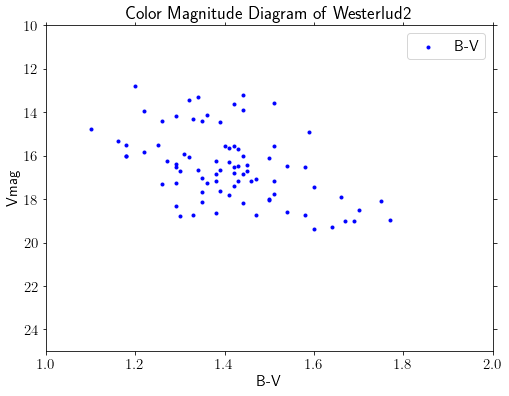

In [20]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig3,ax3 = plt.subplots(figsize=(8,6))

ax3.set_xlabel('B-V')
ax3.set_ylabel('Vmag')

ax3.scatter(BV3,vmag3, color="blue",marker='.',label='B-V')
#ax3.scatter(EBV3,vmag3, color="red",marker='.',label='E(B-V)')

ax3.axis([1.0,2,25,10]) # set range on axis

ax3.tick_params(axis='both',which='minor',direction='in')
ax3.tick_params(top=True,right=True)
ax3.tick_params(which='minor',top=True,right=True)

ax3.set_title(("Color Magnitude Diagram of Westerlud2"))
ax3.legend()

For this question I just plotted the B-V values of the Moffat data against the magnitudes.

## Question 4

In [21]:
Av = 3.1*(EBV3)
#Recall that 3.1 is an R_v value that is representative of the average Interstellar Medium (ISM) dust.

nBV3 = BV3 - EBV3
#correcting for color

nMV3 = vmag3 - Av
#correcting for mag

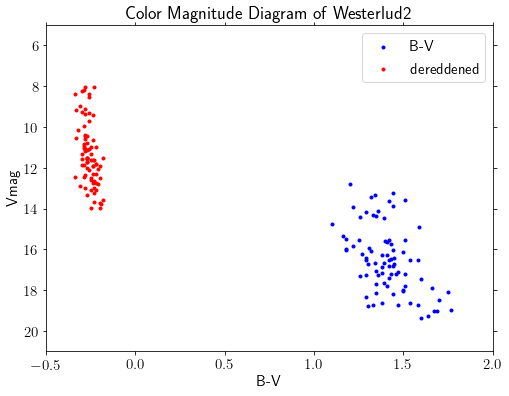

In [22]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig4,ax4 = plt.subplots(figsize=(8,6))

ax4.set_xlabel('B-V')
ax4.set_ylabel('Vmag')

ax4.scatter(BV3,vmag3, color="blue",marker='.',label='B-V')
ax4.scatter(nBV3,nMV3, color="red",marker='.',label='dereddened')

ax4.tick_params(axis='both',which='minor',direction='in')
ax4.tick_params(top=True,right=True)
ax4.tick_params(which='minor',top=True,right=True)
ax4.axis([-0.5,2.0,21,5]) 

ax4.set_title(("Color Magnitude Diagram of Westerlud2"))
ax4.legend()

Text(0.5, 1.0, 'Color Magnitude Diagram of Westerlud2')

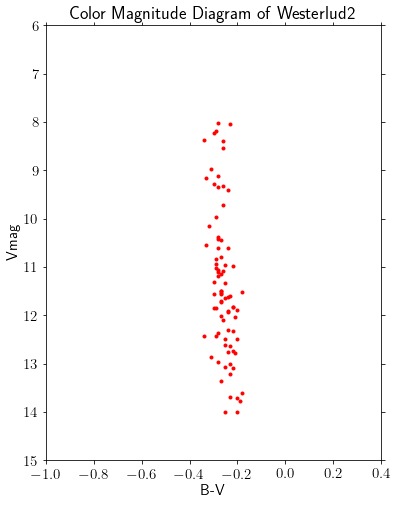

In [23]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig4,ax4 = plt.subplots(figsize=(6,8))

ax4.set_xlabel('B-V')
ax4.set_ylabel('Vmag')

ax4.scatter(nBV3,nMV3, color="red",marker='.')

ax4.tick_params(axis='both',which='minor',direction='in')
ax4.tick_params(top=True,right=True)
ax4.tick_params(which='minor',top=True,right=True)
ax4.axis([-1,0.4,15,6]) # set range on axis

ax4.set_title(("Color Magnitude Diagram of Westerlud2"))

Looking at the plotted data corrected for interstellar reddending in the Moffat paper, I can see that my graph is very similar with data points that range from around a v_mag of 14 to 7 within a (B-V) range of -0.4 to -0.1. From this, I know that I preformed the de-reddening corrections correctly. 

## Question 5

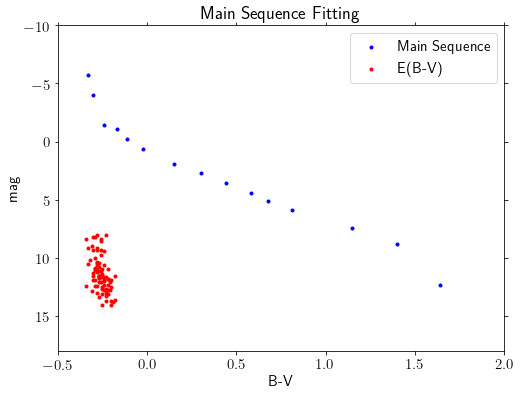

In [24]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig5,ax5 = plt.subplots(figsize=(8,6))

ax5.set_xlabel('B-V')
ax5.set_ylabel('mag')

ax5.scatter(BV_MS,AbsMag_MS, color="blue",marker='.', label='Main Sequence') 
#This is the same theoretical Main Sequence data from Question 1

ax5.scatter(nBV3,nMV3, color="red",marker='.',label='E(B-V)')

ax5.axis([-0.5,2,18,-10]) # set range on axis
ax5.tick_params(axis='both',which='minor',direction='in')
ax5.tick_params(top=True,right=True)
ax5.tick_params(which='minor',top=True,right=True)

ax5.set_title(("Main Sequence Fitting"))
ax5.legend()

From here, we can prfeorm a similar methodology that was followed in Question 1. Looking at this plot, I can guess that the distance modulus (DM) is perhaps 14.5. 

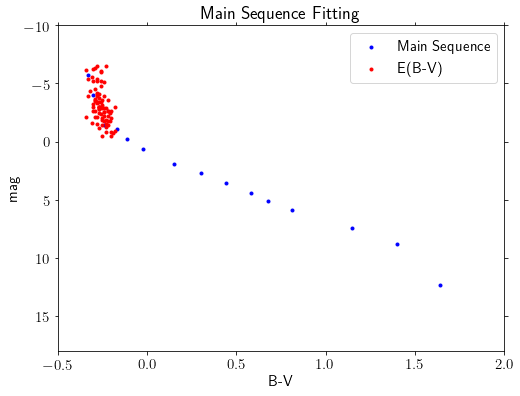

In [25]:
dm6 = 14.5
test6 = nMV3 - dm6


matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig5,ax5 = plt.subplots(figsize=(8,6))

ax5.set_xlabel('B-V')
ax5.set_ylabel('mag')

ax5.scatter(BV_MS,AbsMag_MS, color="blue",marker='.', label='Main Sequence')
ax5.scatter(nBV3,test6, color="red",marker='.',label='E(B-V)')

ax5.axis([-0.5,2,18,-10]) # set range on axis
ax5.tick_params(axis='both',which='minor',direction='in')
ax5.tick_params(top=True,right=True)
ax5.tick_params(which='minor',top=True,right=True)

ax5.set_title(("Main Sequence Fitting"))
ax5.legend()

In [26]:
d6 = (10**(dm6/5))*10
print("So, the distance is about {} pc".format(d6))

So, the distance is about 7943.282347242813 pc


We must keep in mind that we are pretty much eyeballing this distance modulus value. To find a parameter of uncertainty, we can move the dereddened Westerlud 2 data up and down the y axis until we feel that the fit is no longer accurate. The following is an upper bound where I felt that the fit was no longer acceptable (DM = 15.5) 

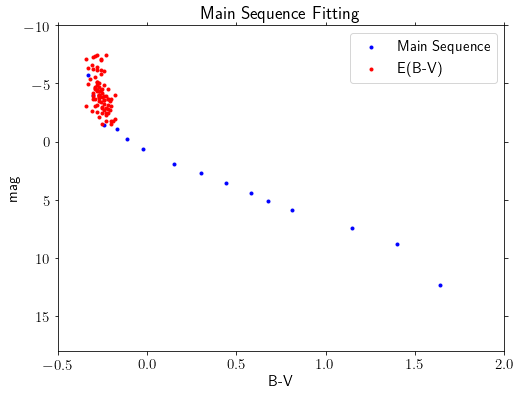

In [27]:
dmhigh = 15.5
testhigh = nMV3 - dmhigh


matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig5,ax5 = plt.subplots(figsize=(8,6))

ax5.set_xlabel('B-V')
ax5.set_ylabel('mag')

ax5.scatter(BV_MS,AbsMag_MS, color="blue",marker='.', label='Main Sequence')
ax5.scatter(nBV3,testhigh, color="red",marker='.',label='E(B-V)')

ax5.axis([-0.5,2,18,-10]) # set range on axis
ax5.tick_params(axis='both',which='minor',direction='in')
ax5.tick_params(top=True,right=True)
ax5.tick_params(which='minor',top=True,right=True)

ax5.set_title(("Main Sequence Fitting"))
ax5.legend()

In [28]:
dhigh = (10**(dmhigh/5))*10
print("So, the upper bound is about {} pc".format(dhigh))

So, the upper bound is about 12589.254117941675 pc


Then, shifting downwards for a lower bound (DM = 13.5):

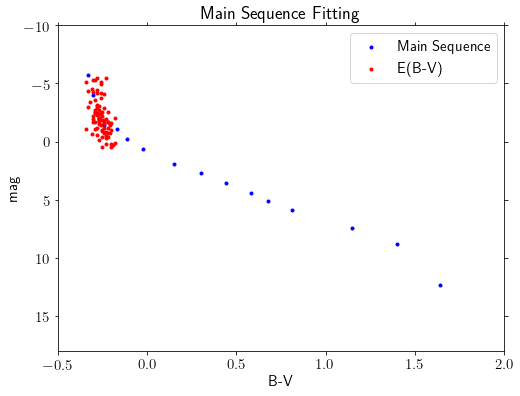

In [29]:
dmlow = 13.5
testlow = nMV3 - dmlow


matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig5,ax5 = plt.subplots(figsize=(8,6))

ax5.set_xlabel('B-V')
ax5.set_ylabel('mag')

ax5.scatter(BV_MS,AbsMag_MS, color="blue",marker='.', label='Main Sequence')
ax5.scatter(nBV3,testlow, color="red",marker='.',label='E(B-V)')

ax5.axis([-0.5,2,18,-10]) # set range on axis
ax5.tick_params(axis='both',which='minor',direction='in')
ax5.tick_params(top=True,right=True)
ax5.tick_params(which='minor',top=True,right=True)

ax5.set_title(("Main Sequence Fitting"))
ax5.legend()

In [30]:
dlow = (10**(dmlow/5))*10
print("So, the lower bound is about {} pc".format(dlow))

So, the lower bound is about 5011.872336272725 pc


So, as an estimate, I could guess that Westerlund 2 is about 7943 pc, +7943pc/-2931pc which is quite a big range but when looking at the Moffat paper, is somewhat reasonable. The paper claims "Fitting the ZAMS relation in Figs. 10 and 11 yields the distance modulus 14.5 + 0.3 and hence distance 7.9 ( + 1.2, - 1.0) kpc." (Moffat et al, 1991, page 651).

Comparing my plot to Figure 10 in Moffat, we see simularities. My plot from the end of question 4 is especially similar, which is the same data plotted over the Main Sequence here. 

## Question 6 

Text(0.5, 1.0, 'Unreddened Spectra of a G star')

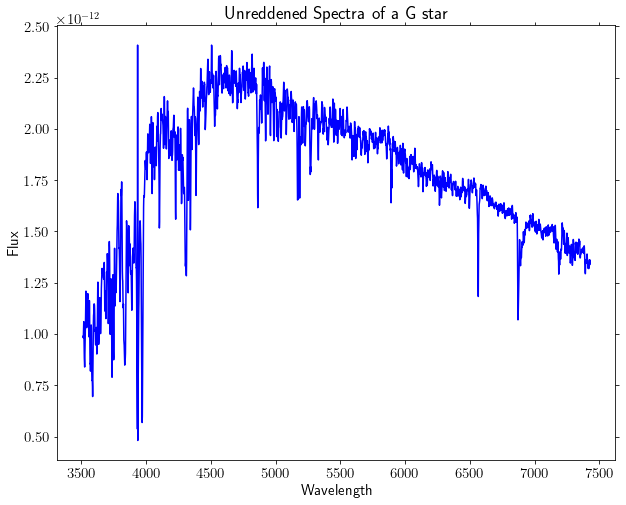

In [31]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig6,ax6 = plt.subplots(figsize=(10,8))

ax6.set_xlabel('Wavelength')
ax6.set_ylabel('Flux')

ax6.plot(wav,erg, color="blue",)

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)

ax6.set_title(("Unreddened Spectra of a G star"))

We are trying to redden this spectra 3500-7400 Angstroms which is 0.35-0.74 microns. 

From the paper we know the following:
<A(X)/A(V)> = a(x) + b(x)/Rv

A(X) = (a(x) + b(x)/Rv) * A(V)

For infared:
a(x) = 0.574x^1.61 ---> x is a wavelength in inverse micron

b(x) = -0.574x^1.61 ---> x is a wavelength in inverse micron

We can take R_v = 3.1 (Which is the average ISM dust)


In [32]:
wavarr = np.array(wav)
a =  0.574*wavarr**(1.6)
b =  -0.527*wavarr**(1.6)


newwav = ((a+b)/3.1)*1    
newwav2 = ((a+b)/3.1)*5

Text(0.5, 1.0, 'Unreddened Spectra of a G star')

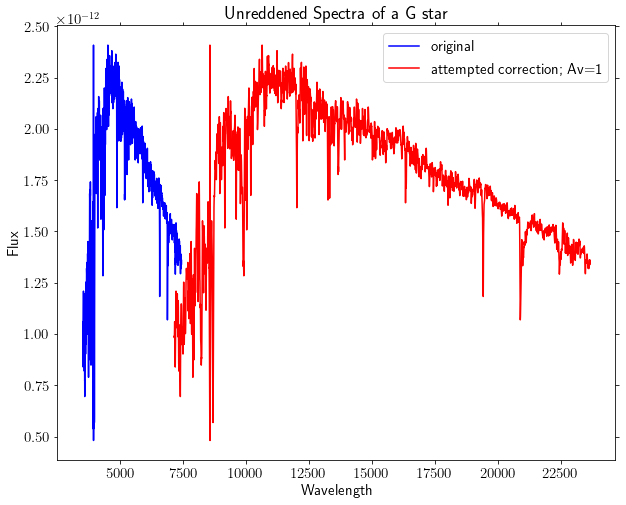

In [33]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig6,ax6 = plt.subplots(figsize=(10,8))

ax6.set_xlabel('Wavelength')
ax6.set_ylabel('Flux')

ax6.plot(wav,erg, color="blue", label = "original")
ax6.plot(newwav,erg, color="red", label = "attempted correction; Av=1")

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)

ax6.legend()
ax6.set_title(("Unreddened Spectra of a G star"))

Text(0.5, 1.0, 'Unreddened Spectra of a G star')

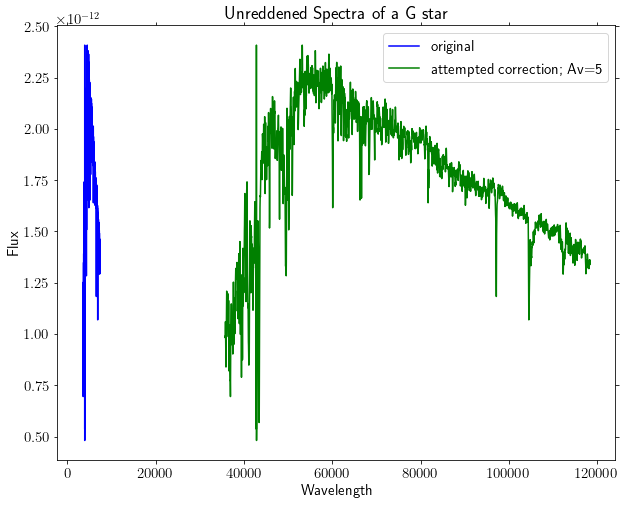

In [34]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig6,ax6 = plt.subplots(figsize=(10,8))

ax6.set_xlabel('Wavelength')
ax6.set_ylabel('Flux')

ax6.plot(wav,erg, color="blue", label = "original")
ax6.plot(newwav2,erg, color="green", label = "attempted correction; Av=5")

ax6.tick_params(axis='both',which='minor',direction='in')
ax6.tick_params(top=True,right=True)
ax6.tick_params(which='minor',top=True,right=True)

ax6.legend()
ax6.set_title(("Unreddened Spectra of a G star"))

So I don't think this is right. The wavelengths for both attempted corrections are pretty ridiculous. My other thought was to try the equation:

Rv = AV/E(B — V)

which was also a bigh part of the paper. The paper was trying to document how extinction can be described with one parameter (Rv) that can be represented by the above equation. E(B-V) is a set of magnitudes, and I know that we can convert between flux and magnitude, however I'm not sure if I would be computing E(B-V) or (B-V). 

m1-m2 = -2.5(log(f1/f2))

If I did do it this way, what would my f1 and f2 be? I would need some kind of reference I think; there would need to be 2 objects.   

Also, so far I have just been taking Rv=3.1, but depending on where the object is, that value could vary so again, I'm not sure if any of this is right. Regardless, this is my attempt at this problem. I know it is wrong but there's a lot going on this week and limited time to do said stuff so I am going to leave it there. 